In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [5]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [6]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

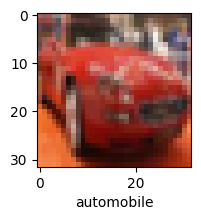

In [7]:
plot_sample(X_train,y_train,5)

In [8]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [9]:
X_train_norm=X_train.astype('float32')
X_train_norm=X_train_norm/255.0
X_train_norm

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [10]:
X_test_norm=X_test.astype('float32')
X_test_norm=X_test_norm/255.0
X_test_norm

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [11]:
cnn=keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')


    




])

In [12]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
cnn.fit(X_train_norm,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 42s 25ms/step - loss: 1.4922 - accuracy: 0.4610
Epoch 2/10
1563/1563 [==============================] - 38s 25ms/step - loss: 1.1212 - accuracy: 0.6053
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9835 - accuracy: 0.6586
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8968 - accuracy: 0.6892
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8301 - accuracy: 0.7125
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7720 - accuracy: 0.7331
Epoch 7/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7262 - accuracy: 0.7501
Epoch 8/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.6783 - accuracy: 0.7664
Epoch 9/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.6438 - accuracy: 0.7766
Epoch 10/10
1563/1563 [==============================] - 38s 24m

In [14]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [15]:
cnn.evaluate(X_test_norm,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9251 - accuracy: 0.6958


[0.9250888824462891, 0.6958000063896179]

In [16]:
y_pred=cnn.predict(X_test_norm)
y_pred[:5]

313/313 [==============================] - 3s 8ms/step


array([[3.68669699e-03, 3.09742391e-05, 6.89415261e-04, 9.21384692e-01,
        5.58586617e-04, 6.72214329e-02, 3.14811338e-03, 1.79165261e-04,
        2.98581156e-03, 1.15073832e-04],
       [1.28125321e-04, 2.94312881e-03, 1.09095115e-08, 6.49440590e-09,
        1.79443482e-09, 1.99356351e-10, 6.94274971e-10, 5.62910274e-11,
        9.96782541e-01, 1.46136983e-04],
       [7.76347890e-02, 6.27219617e-01, 6.52332383e-04, 8.62070918e-03,
        2.62299203e-03, 1.44529360e-04, 2.53224280e-04, 5.97302802e-04,
        2.64987707e-01, 1.72667801e-02],
       [8.33028078e-01, 9.38917568e-04, 4.42019291e-03, 1.40718941e-04,
        1.32968475e-03, 7.36364473e-06, 1.82444026e-04, 1.86280670e-06,
        1.59932449e-01, 1.81434625e-05],
       [1.81212712e-07, 2.51344801e-07, 9.91386012e-04, 7.37925339e-03,
        8.50983858e-01, 1.16375712e-04, 1.40513748e-01, 2.32097204e-06,
        1.24546632e-05, 1.36459761e-07]], dtype=float32)

In [17]:
y_classes=[np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [18]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

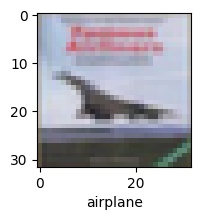

In [19]:
plot_sample(X_test,y_test,3)

In [20]:
classes[y_classes[3]]

'airplane'

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71      1000
           1       0.84      0.80      0.82      1000
           2       0.60      0.60      0.60      1000
           3       0.55      0.50      0.52      1000
           4       0.70      0.58      0.63      1000
           5       0.65      0.53      0.59      1000
           6       0.74      0.77      0.75      1000
           7       0.68      0.78      0.73      1000
           8       0.73      0.85      0.79      1000
           9       0.74      0.81      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.69      0.70      0.69     10000
weighted avg       0.69      0.70      0.69     10000

